In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
from scipy.stats import variation

In [4]:
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

In [5]:
import sklearn
from sklearn.metrics import mean_squared_error

In [20]:
df = pd.read_csv(r'C:\Users\user\Desktop\GlobalSuperstoreData.csv')

In [21]:
df.head(5)

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


In [6]:
df.shape

(51290, 5)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


In [23]:
df.isnull().sum()

Order Date    0
Segment       0
Market        0
Sales         0
Profit        0
dtype: int64

In [24]:
df.describe(percentiles = [0.25,0.50,0.75,0.90,0.95,0.99])

,Sales,Profit
count,51290.000000,51290.000000
mean,246.490581,28.610982
std,487.565361,174.340972
min,0.444000,-6599.978000
25%,30.758625,0.000000
50%,85.053000,9.240000
75%,251.053200,36.810000
90%,632.225736,112.680000
95%,1015.955640,211.500000
99%,2301.000000,587.359950


<AxesSubplot:xlabel='Profit'>

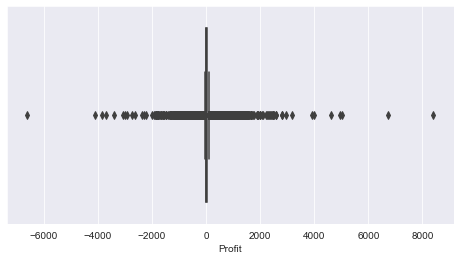

In [25]:
plt.figure(figsize = (8,4))
sns.boxplot(df['Profit'])

<AxesSubplot:xlabel='Sales'>

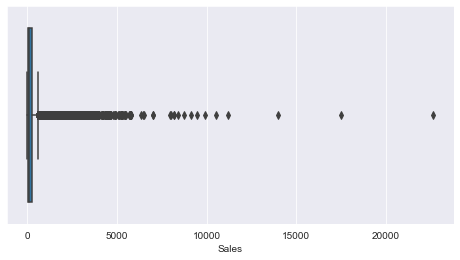

In [26]:
plt.figure(figsize = (8,4))
sns.boxplot(df['Sales'])

Text(0, 0.5, 'count')

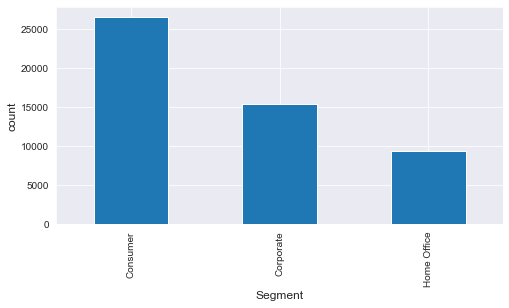

In [27]:
plt.figure(figsize = (8,4))
df['Segment'].value_counts().plot(kind = 'bar')
plt.xlabel('Segment',fontsize = 12)
plt.ylabel('count',fontsize = 12)

Text(0, 0.5, 'count')

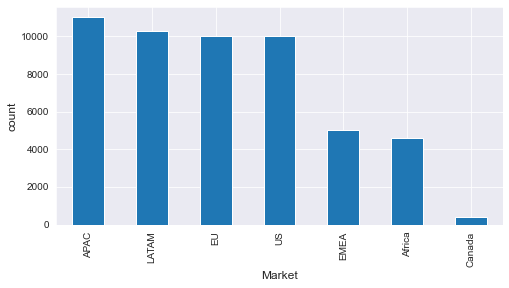

In [28]:
plt.figure(figsize = (8,4))
df['Market'].value_counts().plot(kind = 'bar')
plt.xlabel('Market',fontsize = 12)
plt.ylabel('count',fontsize = 12)

Text(0.5, 1.0, 'Sales vs Profit')

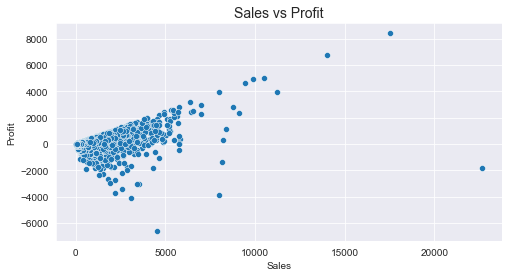

In [29]:
plt.figure(figsize =(8,4))
sns.scatterplot(df['Sales'],df['Profit'])
plt.title('Sales vs Profit',fontsize =14)

Text(0, 0.5, 'Sales')

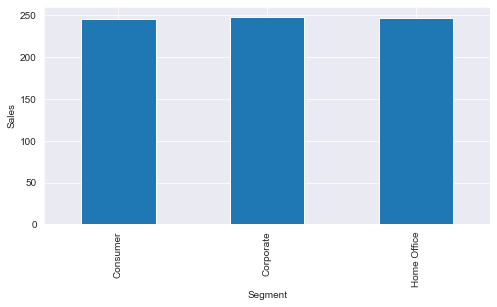

In [15]:
plt.figure(figsize =(8,4))
df.groupby('Segment')['Sales'].mean().plot(kind = 'bar')
plt.ylabel('Sales')

Text(0, 0.5, 'Profits')

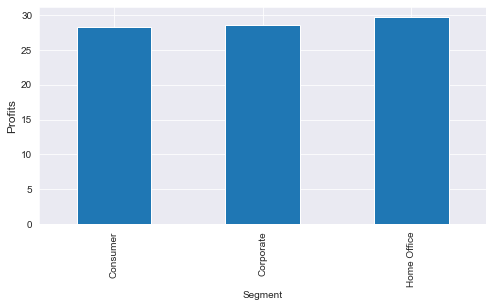

In [30]:
plt.figure(figsize =(8,4))
df.groupby('Segment')['Profit'].mean().plot(kind = 'bar')
plt.ylabel('Profits',fontsize = 12)

Text(0, 0.5, 'Sales')

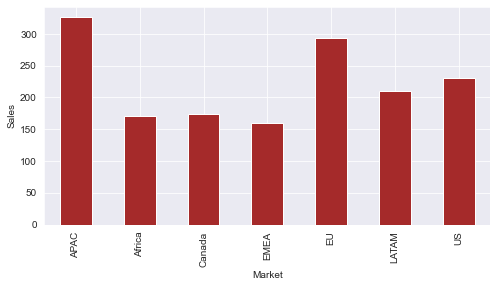

In [17]:
plt.figure(figsize =(8,4))
df.groupby('Market')['Sales'].mean().plot(kind = 'bar',color = 'brown')
plt.ylabel('Sales')

Text(0, 0.5, 'Profit')

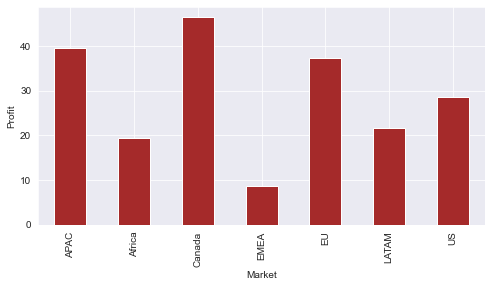

In [18]:
plt.figure(figsize =(8,4))
df.groupby('Market')['Profit'].mean().plot(kind = 'bar',color = 'brown')
plt.ylabel('Profit')

<AxesSubplot:xlabel='Market', ylabel='Sales'>

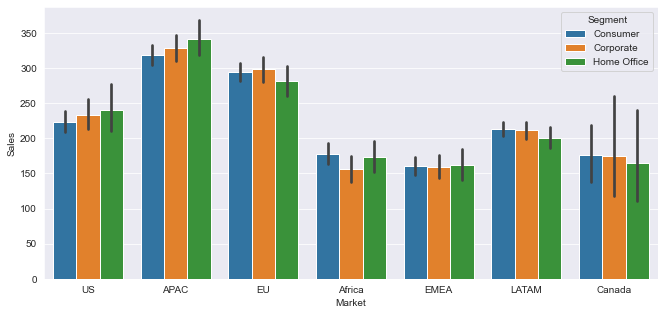

In [19]:
plt.figure(figsize = (11,5))
sns.barplot(data =df ,x = 'Market',y = 'Sales',hue = 'Segment')

<AxesSubplot:xlabel='Market', ylabel='Profit'>

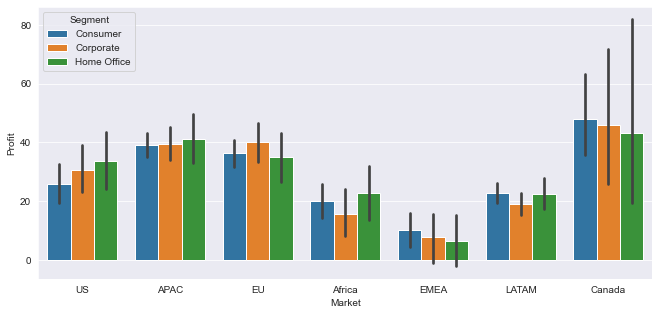

In [20]:
plt.figure(figsize = (11,5))
sns.barplot(data =df ,x = 'Market',y = 'Profit',hue = 'Segment')

In [31]:
df['Market_Segment'] = df['Market']+'-'+df['Segment'] 

In [32]:
df.head()

,Order Date,Segment,Market,Sales,Profit,Market_Segment
0,31-07-2012,Consumer,US,2309.650,762.1845,US-Consumer
1,05-02-2013,Corporate,APAC,3709.395,-288.7650,APAC-Corporate
2,17-10-2013,Consumer,APAC,5175.171,919.9710,APAC-Consumer
3,28-01-2013,Home Office,EU,2892.510,-96.5400,EU-Home Office
4,05-11-2013,Consumer,Africa,2832.960,311.5200,Africa-Consumer


<AxesSubplot:>

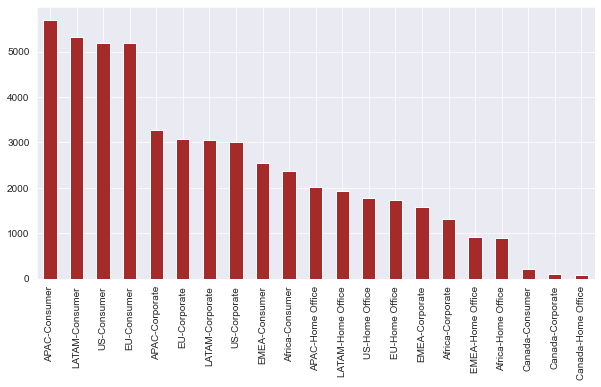

In [33]:
plt.figure(figsize = (10,5))
df['Market_Segment'].value_counts().plot.bar(color = 'brown')

In [34]:
df.drop(['Segment','Market'],axis=1,inplace = True)

In [11]:
df.head(2)

,Order Date,Sales,Profit
0,31-07-2012,2309.650,762.1845
1,05-02-2013,3709.395,-288.7650


In [35]:
df['Order Date'] = pd.to_datetime(df['Order Date']).dt.to_period('M')

In [36]:
df.head()

,Order Date,Sales,Profit,Market_Segment
0,2012-07,2309.650,762.1845,US-Consumer
1,2013-05,3709.395,-288.7650,APAC-Corporate
2,2013-10,5175.171,919.9710,APAC-Consumer
3,2013-01,2892.510,-96.5400,EU-Home Office
4,2013-05,2832.960,311.5200,Africa-Consumer


In [37]:
df.groupby(['Market_Segment', 'Order Date']).sum()

Sales     Profit
Market_Segment Order Date                       
APAC-Consumer  2011-01     18821.9898  2254.4898
               2011-02     23313.3531  4627.8531
               2011-03     26518.4919  2337.8319
               2011-04     12046.0923   633.6423
               2011-05     25941.9000  3838.9500
...                               ...        ...
US-Home Office 2014-08      9036.9855  1168.9436
               2014-09     18312.5080  2788.8755
               2014-10     25045.1610  4104.2505
               2014-11     16151.0440   493.4159
               2014-12     12376.5760  2608.6367

[974 rows x 2 columns]

In [38]:
df_covv = pd.pivot_table(data = df,index = 'Order Date',columns = 'Market_Segment',values='Profit',aggfunc = 'sum')

In [39]:
df_covv

Market_Segment,APAC-Consumer,APAC-Corporate,APAC-Home Office,Africa-Consumer,Africa-Corporate,Africa-Home Office,Canada-Consumer,Canada-Corporate,Canada-Home Office,EMEA-Consumer,...,EMEA-Home Office,EU-Consumer,EU-Corporate,EU-Home Office,LATAM-Consumer,LATAM-Corporate,LATAM-Home Office,US-Consumer,US-Corporate,US-Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,...,392.526,2259.8670,841.3875,2534.5680,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,...,368.070,-783.9945,2234.4060,162.2550,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,...,-15.570,1273.7100,2206.5960,269.7450,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,...,-456.510,2980.0065,981.1470,130.3710,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,...,-33.591,673.0080,1719.0600,443.3100,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781
2011-06,5231.0316,4550.5506,264.6204,-929.148,-400.917,-727.611,7.50,40.08,23.40,745.518,...,551.208,4135.4460,2214.9660,1580.4495,-115.27088,3248.31820,324.38564,2414.4710,447.1375,208.4844
2011-07,1928.5449,2322.9585,3261.9522,787.158,105.597,-318.942,NaN,509.19,8.40,-333.285,...,-2114.334,602.7330,1394.9100,463.4070,2344.33328,-186.83332,298.97200,-2620.8365,648.1498,1636.2932
2011-08,1101.5235,3137.2923,2187.2787,-387.558,-712.866,1999.050,23.88,NaN,NaN,1344.744,...,-218.802,2264.9640,4390.4490,350.1180,2270.28272,317.83228,660.28524,-548.0292,1910.2192,700.9315
2011-09,3088.9449,2040.2007,1221.6693,274.701,832.434,239.550,181.29,52.14,18.06,61.575,...,582.318,6129.7185,2704.1565,2891.2710,1737.60452,-523.86568,696.95344,9813.4142,-262.5736,676.0368


In [40]:
train_len = 42
train = df_covv[0 : train_len]
test = df_covv[train_len : ]

In [42]:
train_mean = np.mean(train)
print(train_mean)

Market_Segment
APAC-Consumer         4400.894243
APAC-Corporate        2574.919807
APAC-Home Office      1511.088314
Africa-Consumer        957.707000
Africa-Corporate       412.617571
Africa-Home Office     377.221071
Canada-Consumer        225.987632
Canada-Corporate        90.980294
Canada-Home Office     118.003750
EMEA-Consumer          423.960286
EMEA-Corporate         182.642643
EMEA-Home Office        84.231366
EU-Consumer           3699.977143
EU-Corporate          2216.299429
EU-Home Office        1224.456536
LATAM-Consumer        2295.555697
LATAM-Corporate       1122.633016
LATAM-Home Office      818.398941
US-Consumer           2686.740912
US-Corporate          1754.199083
US-Home Office        1132.065762
dtype: float64


In [43]:
train_std = np.std(train)
print(train_std)

Market_Segment
APAC-Consumer         2300.457687
APAC-Corporate        1364.837734
APAC-Home Office      1523.508658
Africa-Consumer       1254.932072
Africa-Corporate       780.566850
Africa-Home Office     759.322203
Canada-Consumer        282.555788
Canada-Corporate       162.493114
Canada-Home Office     279.632866
EMEA-Consumer         1124.552711
EMEA-Corporate        1160.698430
EMEA-Home Office       651.283095
EU-Consumer           2202.282289
EU-Corporate          1600.336696
EU-Home Office        1148.627937
LATAM-Consumer        1569.632686
LATAM-Corporate        990.360880
LATAM-Home Office      957.275713
US-Consumer           2715.031412
US-Corporate          1880.200775
US-Home Office        1272.476439
dtype: float64


In [46]:
train_cov = train_std/train_mean
print(train_cov)

Market_Segment
APAC-Consumer         0.522725
APAC-Corporate        0.530051
APAC-Home Office      1.008219
Africa-Consumer       1.310351
Africa-Corporate      1.891744
Africa-Home Office    2.012937
Canada-Consumer       1.250315
Canada-Corporate      1.786025
Canada-Home Office    2.369695
EMEA-Consumer         2.652495
EMEA-Corporate        6.355024
EMEA-Home Office      7.732073
EU-Consumer           0.595215
EU-Corporate          0.722076
EU-Home Office        0.938072
LATAM-Consumer        0.683770
LATAM-Corporate       0.882177
LATAM-Home Office     1.169693
US-Consumer           1.010530
US-Corporate          1.071829
US-Home Office        1.124030
dtype: float64


In [47]:
cov = pd.DataFrame({'Mean' : train_mean, 'Std_Dev' : train_std, 'Coeff_of_Var' : train_cov})

In [48]:
cov

,Mean,Std_Dev,Coeff_of_Var
Market_Segment,,,
APAC-Consumer,4400.894243,2300.457687,0.522725
APAC-Corporate,2574.919807,1364.837734,0.530051
APAC-Home Office,1511.088314,1523.508658,1.008219
Africa-Consumer,957.707000,1254.932072,1.310351
Africa-Corporate,412.617571,780.566850,1.891744
Africa-Home Office,377.221071,759.322203,2.012937
Canada-Consumer,225.987632,282.555788,1.250315
Canada-Corporate,90.980294,162.493114,1.786025
Canada-Home Office,118.003750,279.632866,2.369695


In [49]:
apac_con = df[df['Market_Segment'] == 'APAC-Consumer']

In [50]:
apac_con

,Order Date,Sales,Profit,Market_Segment
2,2013-10,5175.1710,919.9710,APAC-Consumer
6,2011-07,1822.0800,564.8400,APAC-Consumer
7,2012-04,5244.8400,996.4800,APAC-Consumer
14,2013-06,3701.5200,1036.0800,APAC-Consumer
29,2012-02,1878.7200,582.3600,APAC-Consumer
...,...,...,...,...
51215,2013-01,38.9709,-32.3991,APAC-Consumer
51234,2014-12,6.9000,-0.8400,APAC-Consumer
51235,2011-03,17.2800,-13.9200,APAC-Consumer
51236,2013-07,30.6180,1.0080,APAC-Consumer


In [51]:
data1 = apac_con.groupby('Order Date')['Sales'].sum()

In [52]:
data1

Order Date
2011-01    18821.9898
2011-02    23313.3531
2011-03    26518.4919
2011-04    12046.0923
2011-05    25941.9000
2011-06    30398.9316
2011-07    22431.5949
2011-08    20331.0735
2011-09    24860.3949
2011-10    34787.2881
2011-11    29648.3547
2011-12    30554.8614
2012-01    38369.3127
2012-02    29921.4267
2012-03    21561.5634
2012-04    23356.0467
2012-05    31586.4477
2012-06    39108.9078
2012-07    19210.6728
2012-08    34225.1154
2012-09    21521.7960
2012-10    56741.1831
2012-11    49030.2528
2012-12    40201.6080
2013-01    34777.2885
2013-02    18697.8216
2013-03    26298.6804
2013-04    28451.7387
2013-05    42147.0264
2013-06    60163.8225
2013-07    45990.8958
2013-08    40007.0493
2013-09    47835.0258
2013-10    49095.7305
2013-11    47218.6824
2013-12    63324.6315
2014-01    44475.2703
2014-02    26737.0524
2014-03    57235.1793
2014-04    39308.9121
2014-05    49247.6415
2014-06    55151.4699
2014-07    43672.0749
2014-08    48848.3409
2014-09    45424.3119

In [53]:
data1 = pd.DataFrame(data1)

In [54]:
data1

,Sales
Order Date,
2011-01,18821.9898
2011-02,23313.3531
2011-03,26518.4919
2011-04,12046.0923
2011-05,25941.9000
2011-06,30398.9316
2011-07,22431.5949
2011-08,20331.0735
2011-09,24860.3949


In [55]:
data1.index = data1.index.to_timestamp()

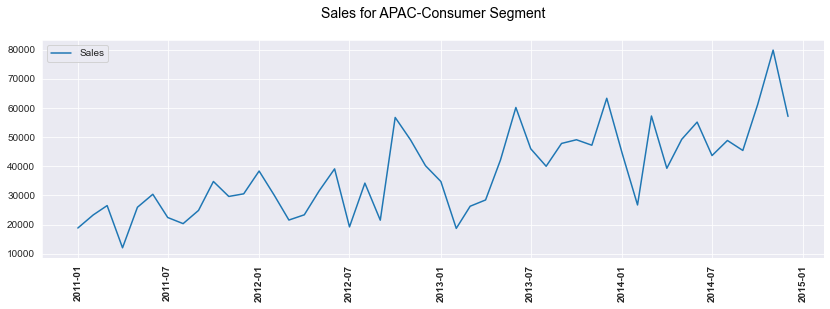

In [56]:
plt.figure(figsize = (14,4))
plt.plot(data1, label='Sales')
plt.legend(loc='best')
plt.title('Sales for APAC-Consumer Segment\n', fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Black'})
plt.xticks(rotation = 90,fontweight="bold")
plt.show()

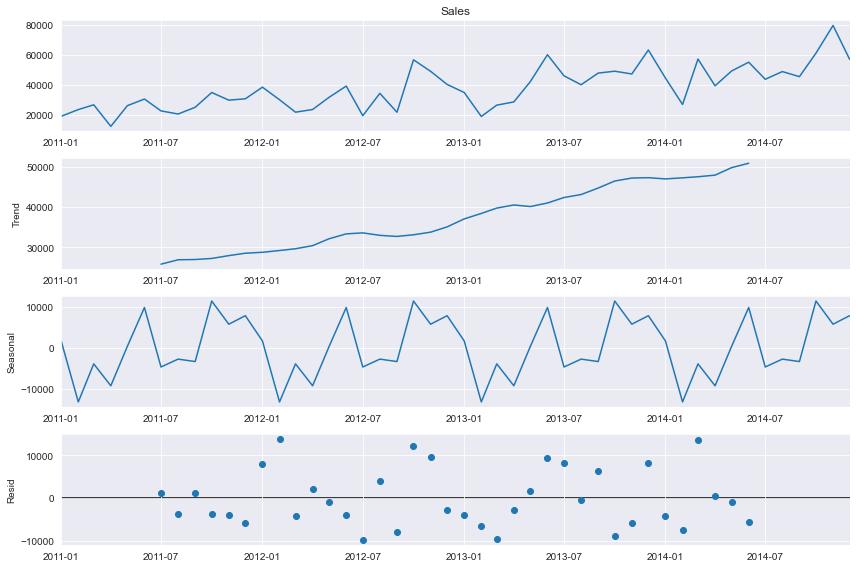

In [59]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(data1.Sales, model ='additive')
fig  = decomposition.plot()
plt.show()

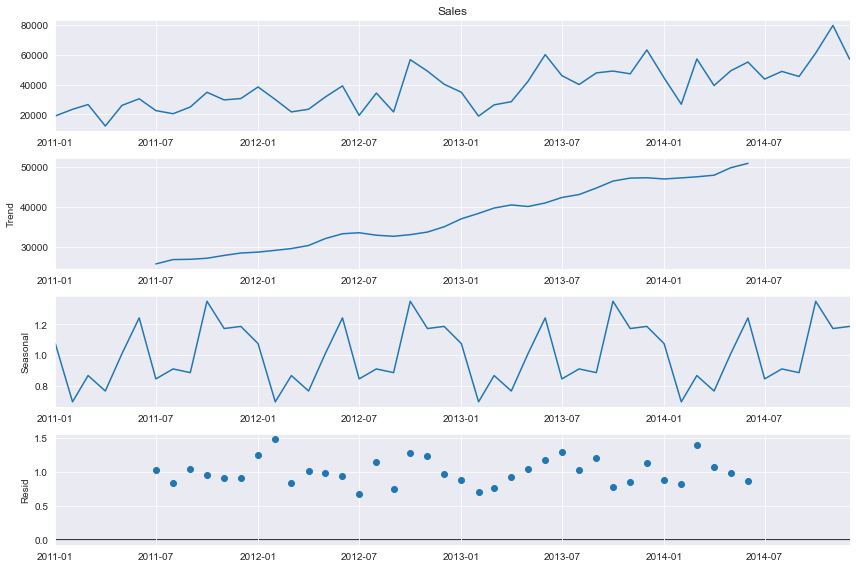

In [60]:
decomposition = sm.tsa.seasonal_decompose(data1.Sales,model = 'multiplicative')
fig = decomposition.plot()
plt.show()

In [61]:
train_len = 42
train = data1[0 : train_len]
test = data1[train_len : ]

In [50]:
train.shape

(42, 1)

In [51]:
test.shape

(6, 1)

In [65]:
y_naive = test.copy()
y_naive['naive_forecast'] = train['Sales'][train_len-1]
# Plot train, test and forecast

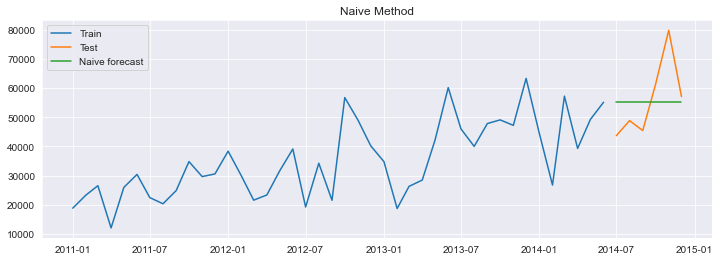

In [69]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [71]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Sales'].mean()

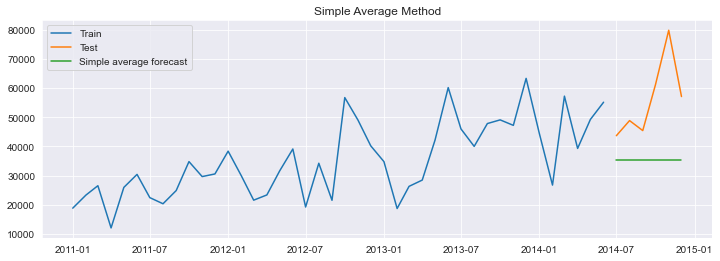

In [72]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

In [74]:
y_sma = data1.copy()
ma_window = 12
y_sma['sma_forecast'] = data1['Sales'].rolling(ma_window).mean()
y_sma['sma_forecast'][train_len:] = y_sma['sma_forecast'][train_len-1]

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()